In [30]:
import os,subprocess
workdir='/nagyvinyok/adat84/sotejedlik/ribli/expression/modelling'
subprocess.call(['mkdir',workdir])
os.chdir(workdir)

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.style.use('ggplot')
%matplotlib inline

In [31]:
from sklearn import tree
from sklearn import svm
from sklearn import ensemble

In [32]:
import pandas as pd
import numpy as np
import gc

def read_my_data(fname,**kwargs):
    """Load my data from file into np.arrays.
    
    I had to use garbage collector, because pandas read_csv leaves garbage around.
    """
    
    #load data
    print "Loading data... "
    x=pd.read_csv(fname,sep='\t',header=None)
    
    # for some reason not everything is cleaned up
    #when using the pandas read_csv
    gc.collect()
    
    #probe_id=x[0]
    #y=x.iloc[:,-1].values.astype(np.int8)
    #x=x.iloc[:,1:-1].values.astype(np.int8)
    #return probe_id,x,y
    
    return x[0],x.iloc[:,1:-1].values.astype(np.int8),x.iloc[:,-1].values.astype(np.float64)

In [33]:
train_id,train_x,train_y = read_my_data(fname='../prepare_data/naive_feat_vect.csv')
print train_x.shape

Loading data... 
(234044, 600)


In [38]:
from scipy.stats import entropy
def my_entropy(x):
    return np.histogram(x,bins=[0.5,1.5,2.5,3.5,4.5],normed=True)[0]

def plot_entropy(train_x,xmin=-500,xmax=100):
    
    entr = [my_entropy(train_x[:,i]) for i in xrange(600)]

    fig,ax=plt.subplots()
    fig.set_size_inches(16,12)
    box=ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
        
    x=np.arange(600)-500
    y=np.array(entr)
    
    ax.step(x,y[:,0],lw=1,label='A')
    ax.step(x,y[:,1],lw=1,label='C')
    ax.step(x,y[:,2],lw=1,label='G')
    ax.step(x,y[:,3],lw=1,label='T')
    
    ax.legend(fancybox=True,loc='center left', bbox_to_anchor=(1, 0.5),fontsize=16)
    
    ax.set_ylabel('frequency',fontsize=16)
    ax.set_xlabel('pos',fontsize=16)

    dump=ax.set_xlim(xmin,xmax)

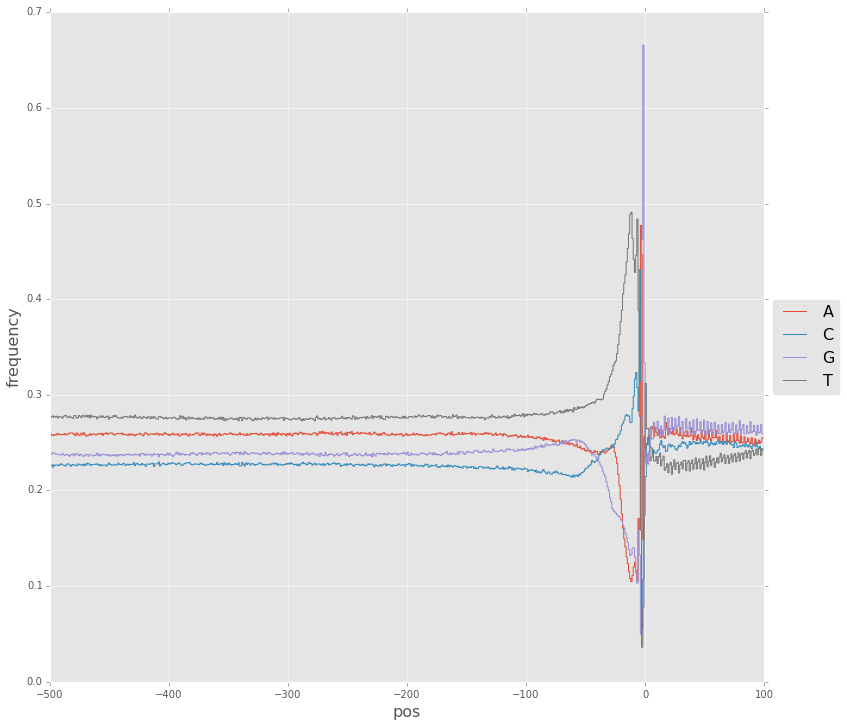

In [39]:
plot_entropy(train_x)

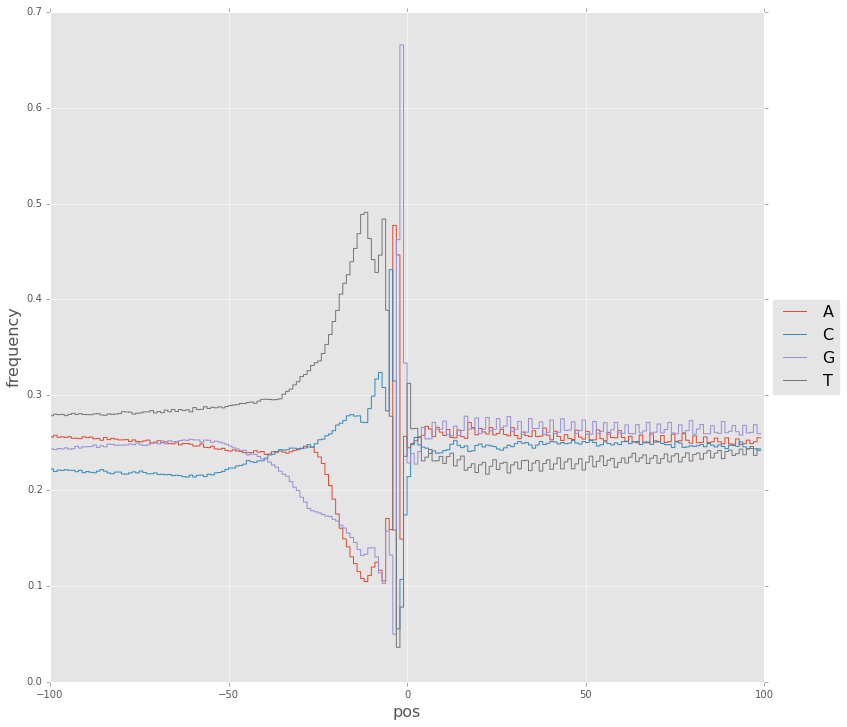

In [40]:
plot_entropy(train_x,xmin=-100,xmax=100)

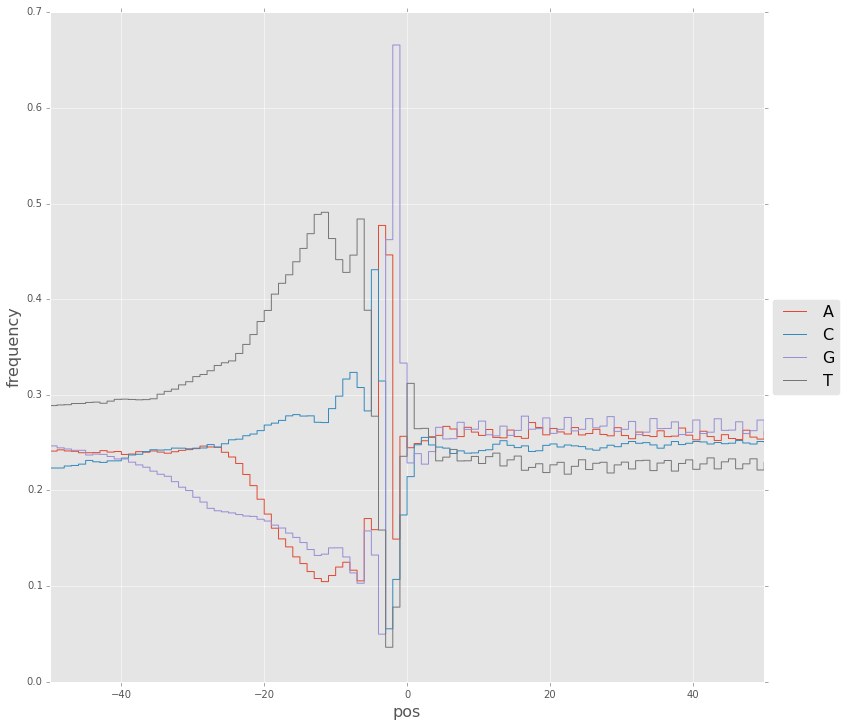

In [41]:
plot_entropy(train_x,xmin=-50,xmax=50)